<a href="https://colab.research.google.com/github/LCaravaggio/DataExtraction/blob/main/API_BCRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas Cambiarias

In [1]:
import requests

moneda='EUR'
fechadesde='2024-01-01'
fechahasta='2024-06-07'
limit=100
offset=10

url = f'https://api.bcra.gob.ar/estadisticascambiarias/v1.0/Cotizaciones/{moneda}?fechadesde={fechadesde}&fechahasta={fechahasta}&limit={limit}&offset={offset}'
response = requests.get(url, verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
import pandas as pd
import json

json_data = json.loads(response.text)

results = json_data['results']

data_list = []
for item in results:
    fecha = item['fecha']
    for detalle in item['detalle']:
        detalle['fecha'] = fecha
        data_list.append(detalle)

df = pd.DataFrame(data_list)

In [3]:
df

,codigoMoneda,descripcion,tipoPase,tipoCotizacion,fecha
0,EUR,EURO,1.0852,966.37060,2024-05-24
1,EUR,EURO,1.0811,962.17900,2024-05-23
2,EUR,EURO,1.0837,963.95115,2024-05-22
3,EUR,EURO,1.0854,964.92060,2024-05-21
4,EUR,EURO,1.0865,965.35525,2024-05-20
...,...,...,...,...,...
92,EUR,EURO,1.0964,892.25032,2024-01-08
93,EUR,EURO,1.0944,888.87168,2024-01-05
94,EUR,EURO,1.0950,888.81150,2024-01-04
95,EUR,EURO,1.0911,884.99121,2024-01-03


# Principales Variables

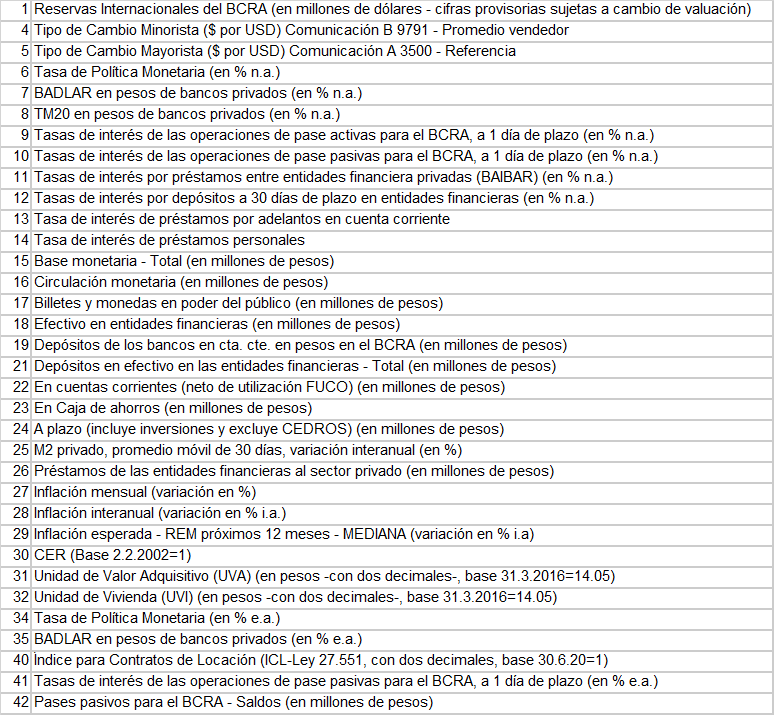

In [9]:
idVariable=1
desde='2023-05-16'
hasta='2024-05-16'

url = f'https://api.bcra.gob.ar//estadisticas/v2.0/DatosVariable/{idVariable}/{desde}/{hasta}'
response = requests.get(url, verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [15]:
json_data = json.loads(response.text)

resultados = json_data['results']

df = pd.DataFrame(resultados)
df['fecha'] = pd.to_datetime(df['fecha'])

In [16]:
df

,idVariable,fecha,valor
0,1,2023-05-16,33350.0
1,1,2023-05-17,33298.0
2,1,2023-05-18,33132.0
3,1,2023-05-19,33159.0
4,1,2023-05-22,33062.0
...,...,...,...
239,1,2024-05-10,28361.0
240,1,2024-05-13,28325.0
241,1,2024-05-14,28368.0
242,1,2024-05-15,28271.0
